# 3M1 - Search methods for univariate continuous functions

Luca Magri, lm547@cam.ac.uk

(With many thanks to Professor Gábor Csányi.)

Univariate function = function of one variable

## Lecture 2: List of contents
- General algorithm
- Convergence criteria
- Rate of convergence
- Line search
 - Interval reduction
 - Golden section method
- Fitting with quadratic functions
 - Fitting with a polynomial at three points
 - Fitting with a polynomial at one point: Newton's method and quasi-Newton method

## Search methods for multivariate functions

1. Start with an initial guess, $x_0$, for the minimum of $f(x)$
1. Propose a __search direction__, $d_k$
1. Propose a step size $\alpha_k$ along $d_k$, typically, by an inner __line search__ loop to find the lowest value of $f(x)$ along the direction $d_k$
1. Update the estimate of the minimum location, $x_{k+1} = x_k+\alpha_k d_k$
1. Back to 2 until convergence  


- In 1D, problem of convergence is "easy", robustness is "hard"
 - Robustness is  the ability of the algorithm to operate at unexpected conditions
- In >1D, step 3 itself is a 1D optimisation problem 
- In >1D, most of the effort is in the design of an algorithm for step 2

## Convergence criteria

- It can be assessed in different ways

\begin{align}
&\textrm{Norm of the residual}\;\;\;&\left\| f(x_{k+1}) - f(x_k)\right\| &\lt \varepsilon_f\\
\\
&\textrm{Norm of the error}\;\;\;&\left\| x_{k+1} - x_k\right\| &\lt \varepsilon_x\\
\\
&\textrm{Norm of the gradient}\;\;\;&\left\| \nabla f(x_k)\right\| &\lt \varepsilon_g\\
\end{align}

- $\epsilon_{\bullet}$ are user-defined tolerances
- The test on the norm of the gradient is often used
 - When the curvature is small, it should be combined with a test on the norm of the error
- Search methods find a _local_ minimum 
 - Convex functions have only one minimum. Therefore, the local minimum is also a global minimum

## Rate of convergence

- The __rate of convergence__ of an algorithm quantifies how fast the approximate solution approaches the true minimum $x^*$, close to the minimum, iteration after iteration
$$
\lim_{k\rightarrow\infty} \frac{\left\| x_{k+1}-x^*\right\|}{\left\| x_k-x^* \right\|^p} = \beta
$$
The operation $\lim_{k\rightarrow\infty}$ means that the rate of convergence is an _asymptotic_ quantity. 
  - For the keen reader, the rate of convergence is the speed at which a sequence converges to its limit, if it converges
- $\beta$ is the __convergence ratio__: the smaller the better

- $p$ is the __order of convergence__: the larger the better
 - $p=1$ $\rightarrow$ linear convergence
 - $p=2$ $\rightarrow$ quadratic convergence. The number of correct digits _roughly_ doubles at each  iteration

 
- Example
$$ x_k = 2 + 3^{-k}$$
$x_k\rightarrow 2$ for $k\rightarrow \infty$ . The sequence converges linearly to its limit $2$ because
\begin{align}
\lim_{k\rightarrow\infty} \frac{\left\| x_{k+1}-x^*\right\|}{\left\| x_k-x^* \right\|^p} = \frac{2 + 3^{-(k+1)}-2}{2 + 3^{-k}-2}=\frac{ 3^{-(k+1)}}{3^{-k}} = 3^{-1-k+k}=\frac{1}{3}
\end{align}
 Therefore, $\beta=1/3$ and $p=1$.

## Line search

- The search of the minimum for a univariate function is called _line search_
- This is the goal, for example, of the inner loop of multi-variable search  
-  __Interval reduction__ is about the best you can do if the gradient is not available

- Example with the nonlinear function
\begin{align}f(x) = x^2 + \frac{345000}{\pi x}\;\;\;\;\;\;\;\;\;\;\;\; 22 < x < 48
\end{align}
The minimum is 
$$ x^* = \left(\frac{345000}{2\pi}\right)^{\frac 1 3} \approx 38$$

- Now we seek the minimum by line search

In [2]:
from pylab import *
import numpy as np
# function we will optimize
def R(x):
    return x**2+(345.0*1000.0)/(np.pi*x)

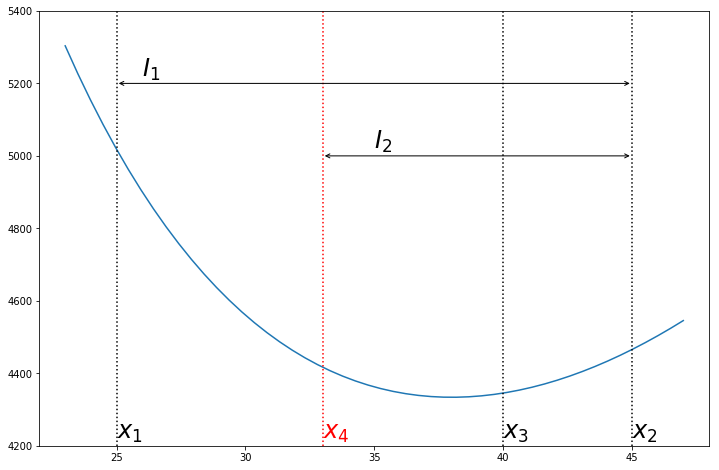

In [3]:
figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
plot((25,25),(ymin,ymax), 'k:' ) ; text(25, 4220, "$x_1$", fontsize=24)
plot((45,45),(ymin,ymax), 'k:' ) ; text(45, 4220, "$x_2$", fontsize=24)
plot((40,40),(ymin,ymax), 'k:' ) ; text(40, 4220, "$x_3$", fontsize=24)
plot((33,33),(ymin,ymax), 'r:' ) ; text(33, 4220, "$x_4$", fontsize=24, color='r')
annotate(s='', xy=(25,5200), xytext=(45,5200), arrowprops=dict(arrowstyle='<->')); text(26,5220, "$I_1$", fontsize=24)
annotate(s='', xy=(33,5000), xytext=(45,5000), arrowprops=dict(arrowstyle='<->')); text(35,5020, "$I_2$", fontsize=24)
show()

1. Start with three points, $x_1,x_2,x_3$ such that 
$$f(x_1) \gt f(x_3)\;\;\;\textrm{and}\;\;\; f(x_3) \lt f(x_2)$$
   $x_1$ and $x_2$ are the bounds, $x_3$ is the interior point
1. As a consequence of [Bolzano theorem](http://mathworld.wolfram.com/BolzanosTheorem.html), there exists a minimum in the interval $I_1 = [x_1,x_2]$. 
   This is called __bracketing__
1. Compute $f(x_4)$ at a fourth point $x_4 \in I_1$
1. If $f(x_4) \gt f(x_3)$, the minimum must be in $I_2 = [x_4,x_2]$, otherwise the minimum is in $I'_2=[x_1,x_3]$
1. Continue bracketing until the interval is smaller than a tolerance

## Golden section search

Where to place the interior points? 

- We impose a constant reduction factor $\beta$ for the interval length (convergence is linear, $p=1$)
$$\frac{I_2}{I_1} = \frac{\Delta x}{I_2} \text{ with }\Delta x = I_1 - I_2$$
set $\beta=I_2/I_1$, and solve quadratic:

$$\beta = \frac{\sqrt{5}-1}{2}\approx 0.618$$

- This is the inverse of the [Golden ratio](https://en.wikipedia.org/wiki/Golden_ratio), also known as golden section or sectio aurea, hence the name of this search method

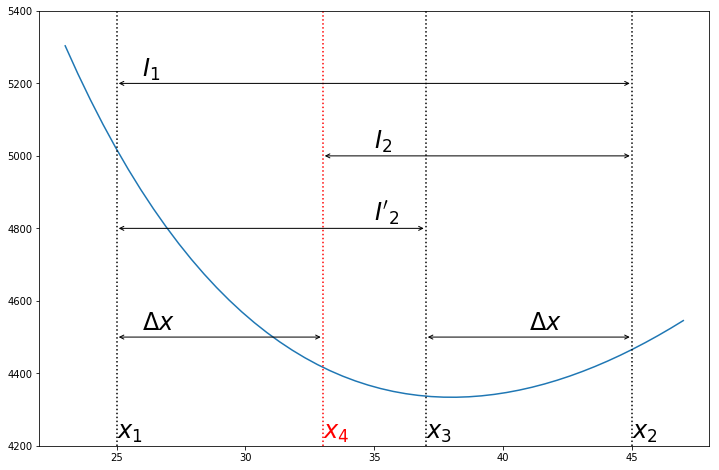

In [4]:
figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
plot((25,25),(ymin,ymax), 'k:' ) ; text(25, 4220, "$x_1$", fontsize=24)
plot((45,45),(ymin,ymax), 'k:' ) ; text(45, 4220, "$x_2$", fontsize=24)
plot((37,37),(ymin,ymax), 'k:' ) ; text(37, 4220, "$x_3$", fontsize=24)
plot((33,33),(ymin,ymax), 'r:' ) ; text(33, 4220, "$x_4$", fontsize=24, color='r')
annotate(s='', xy=(25,5200), xytext=(45,5200), arrowprops=dict(arrowstyle='<->')); text(26,5220, "$I_1$", fontsize=24)
annotate(s='', xy=(33,5000), xytext=(45,5000), arrowprops=dict(arrowstyle='<->')); text(35,5020, "$I_2$", fontsize=24)
annotate(s='', xy=(25,4800), xytext=(37,4800), arrowprops=dict(arrowstyle='<->')); text(35,4820, "$I'_2$", fontsize=24)
annotate(s='', xy=(37,4500), xytext=(45,4500), arrowprops=dict(arrowstyle='<->')); text(41,4520, "$\Delta x$", fontsize=24)
annotate(s='', xy=(25,4500), xytext=(33,4500), arrowprops=dict(arrowstyle='<->')); text(26,4520, "$\Delta x$", fontsize=24)
show()

In [5]:
def golden_section(f, x1, x2, tol):
    # initial points
    f1 = f(x1) # x1 = left bound
    f2 = f(x2) # x2 = right bound
    # now set up golden section ratios
    r = (np.sqrt(5)-1)/2.0
    # third point
    x3 = x1*(1-r)+x2*r; f3=f(x3) #x3 = interior point

    # now loop until convergence
    traj = []
    it  = 0
    while abs(x1-x2) > tol:
        x4 = x1*r+x2*(1-r); f4=f(x4) # x4 = test point
        traj.append((x1, x2, x3, x4))
        if f4 < f3:
            x2=x3; f2=f3
            x3=x4; f3=f4
        else:
            x1=x2; f1=f2
            x2=x4; f2=f4
        print("x1", "x2",)
        print(round(x1,1), round(x2,1))
        print("\n")
    return x3,traj


x, t = golden_section(R, 25, 45, 0.5)

('x1', 'x2')
(45.0, 32.6)


('x1', 'x2')
(32.6, 40.3)


('x1', 'x2')
(40.3, 35.6)


('x1', 'x2')
(40.3, 37.4)


('x1', 'x2')
(37.4, 39.2)


('x1', 'x2')
(37.4, 38.5)


('x1', 'x2')
(38.5, 37.8)


('x1', 'x2')
(37.8, 38.2)




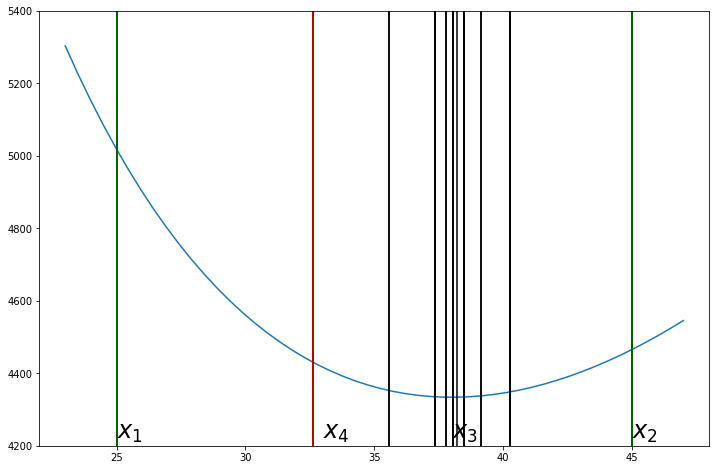

In [6]:

fig = figure(figsize=(12,8))
x = np.linspace(23,47,50)
plot(x, R(x))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
text(25, 4220, "$x_1$", fontsize=24)
text(45, 4220, "$x_2$", fontsize=24)
text(38, 4220, "$x_3$", fontsize=24)
text(33, 4220, "$x_4$", fontsize=24)

def animate(i):
    ax=gca()
    for j in range(1,len(ax.lines)):
        ax.lines[j].set_color('k')
    plot((t[i][0],t[i][0]),(ymin,ymax), 'g' ) 
    plot((t[i][1],t[i][1]),(ymin,ymax), 'g' )  
    plot((t[i][2],t[i][2]),(ymin,ymax), 'k' )  
    plot((t[i][3],t[i][3]),(ymin,ymax), "r")


import matplotlib.animation
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t), interval=1000)

from IPython.display import HTML
HTML(ani.to_jshtml())


## Robustness

How could the previous program go wrong? 
- The initial interval does not contain a minimum 

Much of practical optimisation is actually about __robustness__, creating software that copes with unexpected situations

## Fitting with a quadratic polynomial at three points

We approximate the problem with a simpler one, which we can easily solve.

- We can _fit a quadratic function_  
$$
q(x) = a_0 + a_1 x + a_2 x^2
$$
to match $f(x)$ at three points
- Find the minimum of the quadratic function
- Test this minimum 




- To obtain the coefficients, we impose 
$$
\begin{array}
\\
f(x_1) &= a_0 + a_1 x_1 + a_2 x_1^2\\
f(x_2) &= a_0 + a_1 x_2 + a_2 x_2^2\\
f(x_3) &= a_0 + a_1 x_3 + a_2 x_3^2\\
\end{array}
$$
which in matrix form is cast as
$$
\begin{bmatrix}
f(x_1)\\
f(x_2)\\
f(x_3)\\
\end{bmatrix}
=
\begin{bmatrix}
1&x_1&x_1^2\\
1&x_2&x_2^2\\
1&x_3&x_3^2\\
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
\end{bmatrix}
$$

- The inversion of the matrix provides the solution

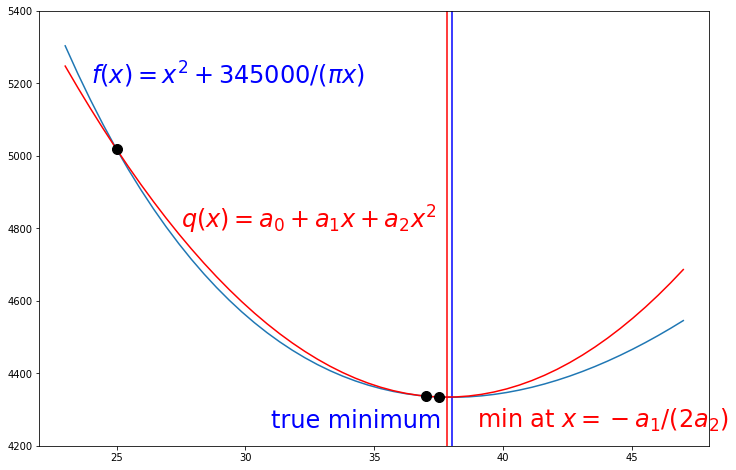

In [7]:
figure(figsize=(12,8))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
x = np.linspace(23,47,50)
# function
plot(x, R(x)); text(24, 5200, "$f(x) = x^2 + 345000/(\pi x)}$", color='b', fontsize=24)

# true minimum
plot([38,38], [ymin,ymax], "b-"); text(31, 4250, "true minimum", color="b", fontsize=24)

# quadratic approx
x1=25; x2=37.5; x3=37
m = np.matrix([[1, x1, x1**2],[1, x2, x2**2], [1, x3, x3**2]])
a = np.dot(np.linalg.inv(m),np.matrix([[R(x1)],[R(x2)],[R(x3)]]))
plot(x, a[0,0]+a[1,0]*x+a[2,0]*x**2, 'r-')
plot([x1,x2,x3],[R(x1),R(x2),R(x3)], "ko", markersize=10)
text(27.5, 4800, "$q(x) = a_0 + a_1 x + a_2 x^2$", color='r', fontsize=24);

# minimum of quadratic approx
x4 = -a[1,0]/(2*a[2,0])
plot([x4, x4], [ymin,ymax], "r-") ; text(39,4250, "min at $x=-a_1/(2a_2)$", color="r", fontsize=24);


## Fitting with a quadratic polynomial at one point: Newton's method

- Instead of fitting the function values at three points, we can fit the function value, first and second derivatives evaluated at a single point $x_0$

$$
f(x) = f(x_0) + (x-x_0) f'(x_0) + \frac12 (x-x_0)^2 f''(x_0) + h.o.t.
$$

- We neglect the higher order terms ($h.o.t.$) and approximate $f(x)$ as
$$
q(x) = f(x_0) + (x-x_0) f'(x_0) + \frac12 (x-x_0)^2 f''(x_0)
$$

- To calculate the minimum of $q(x)$, we set its derivative to zero
\begin{align}
q'(x) & = f'(x_0) + (x-x_0) f''(x_0) \\
& = 0
\end{align}
- The solution is 
$$
x = x_0 - \frac{f'(x_0)}{f''(x_0)}
$$

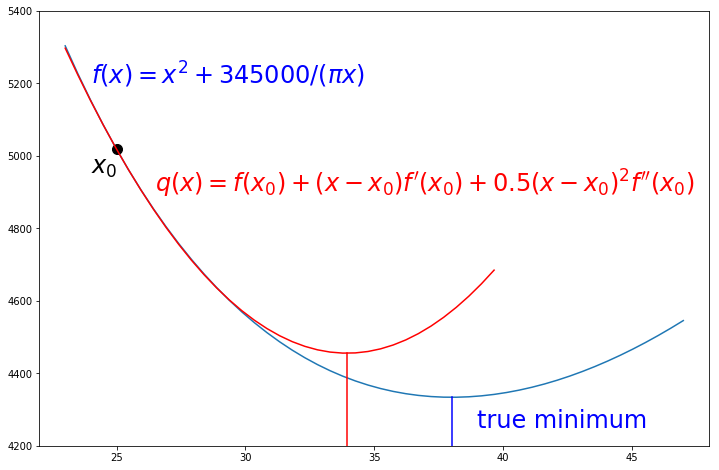

In [23]:
figure(figsize=(12,8))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
x = np.linspace(23,47,50)
# function
plot(x, R(x)); text(24, 5200, "$f(x) = x^2 + 345000/(\pi x)$", color='b', fontsize=24)

# true minimum
plot([38,38], [ymin,R(38)], "b-"); text(39, 4250, "true minimum", color="b", fontsize=24)

x0=25
plot([x0],[R(x0)], "ko", markersize=10)
text(24,4950, "$x_0$", fontsize=24)

# quadratic approx
def Rp(x):
    return 2*x-(345*1000)/(np.pi*x**2)
def Rpp(x):
    return 2*(345*1000)/(np.pi*x**3)

def q(x):
    return R(x0)+(x-x0)*Rp(x0)+0.5*(x-x0)**2*Rpp(x0)
plot(x[:35], q(x[:35]), 'r-')
text(26.5, 4900, "$q(x) = f(x_0) + (x-x_0)f'(x_0) + 0.5(x-x_0)^2 f''(x_0)$", color='r', fontsize=24)
x1=x0-Rp(x0)/Rpp(x0)
plot([x1, x1], [ymin,q(x1)], "r"); 

### Remarks on Newton's method

The Newton's method
- might not be as good as the previous 3-point method
- is sensitive to the choice of the initial point
- can make the estimate worse
- has problems when $f''(x_0)$ is zero or negative

- Both polynomial fitting methods can be iterated to refine esimate
- Newton's method, when it works, has a quadratic ($p=2$) convergence
- Newton's method _generalises_ to multidimensional searches

## Newton's method can converge to the wrong extremum 

- Example with the nonlinear function
$$ f(x) = -10000e^{-\frac{x^2}{350}}+\frac{345000}{\pi x}\;\;\;\;\;\;\;\;\;\;\;\; 9 < x < 40$$
We focus on the positive $x$-axis. The minimum is 
$$ x^* \approx 15.7$$
The maximum is 
$$ x^*_{max} \approx 30.9$$

<!--- - $f''(x)=0$ when $x=20.8$ --->

- Now we plot the approximation made by Newton's method

In [ ]:
figure(figsize=(12,8))
ymin=1900
ymax=3600
axis((9, 40, ymin, ymax))
x = np.linspace(10,40,50)
# function
def f(x):
    return -10000*exp(-x**2.0/350.0)+(345*1000)/(np.pi*x)
plot(x, f(x)); text(12, 3200, "$f(x) = -10000*\exp(-x^2/350) + 345000/(\pi x)$", color='b', fontsize=24)

# true minimum
m = 15.7
plot([m,m], [ymin,f(m)], "b-"); text(m+1, 1950, "true minimum", color="b", fontsize=24)

x0=14.#  # 12 14 17 19 21
plot([x0],[f(x0)], "ko", markersize=10)
text(25,2550, "$x_0$", fontsize=24)


# quadratic approx
def fp(x):
    return 10000*exp(-x**2.0/350.0)*2*x/350-(345*1000)/(np.pi*x**2)
def fpp(x):
    return -10000*exp(-x**2.0/350.0)*4*x**2/350**2 + 10000*exp(-x**2/350)*2/350 + 2*(345*1000)/(np.pi*x**3)

def qq(x):
    return f(x0)+(x-x0)*fp(x0)+0.5*(x-x0)**2*fpp(x0)
plot(x, qq(x), 'r-')
text(15, 3000, "$q(x) = f(x_0) + (x-x_0)f'(x_0) + 0.5(x-x_0)^2 f''(x_0)$", color='r', fontsize=24)
x1=x0-fp(x0)/fpp(x0)
plot([x1, x1], [ymin,qq(x1)], "r"); 

## Quasi-Newton methods

- In anticipation of multivariate functions, we stress that the computation of the second derivatives in the Hessian $H=\nabla^2 f(x)$ can be computationally prohibitive 
- A large number of methods are designed to approximate the second derivative
- The simplest approximation is the __secant method__, which takes the current and previous points to estimate the second derivative at the current point

$$
f''(x_1) \approx \frac{f'(x_1)-f'(x_0)}{x_1-x_0}
$$

- The Taylor expansion around $x_1$ is approximated as 
$$ s(x) = f(x_1) + (x-x_1)f'(x_1) + \frac{1}{2}(x-x_1)^2 \left(\frac{f'(x_1)-f'(x_0)}{x_1-x_0}\right)$$

- Setting $s'(x)=0$ yields the estimate for the minimum 

$$
x = x_1 - f'(x_1) \frac{x_1-x_0}{f'(x_1)-f'(x_0)}
$$

- It can be shown that convergence is *superlinear*, $p = (1+\sqrt{5})/2 \approx 1.618$
- It has higher dimensional generalisations:
 - Family of Broyden's methods, including the most widely used BFGS method
 - The Barzilai-Borwein method (two-point steepest descent), which is often more robust
  - We will see the Barzilai-Borwein method in action in the next lecture

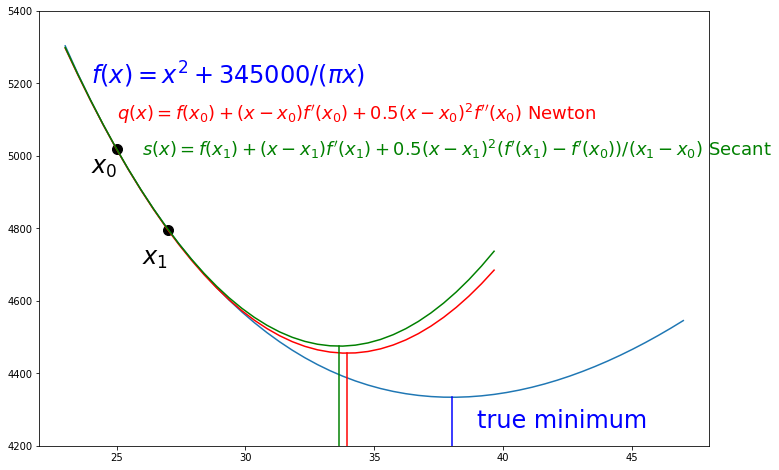

In [10]:
figure(figsize=(12,8))
ymin=4200
ymax=5400
axis((22, 48, ymin, ymax))
x = np.linspace(23,47,50)
# function
plot(x, R(x)); text(24, 5200, "$f(x) = x^2 + 345000/(\pi x)$", color='b', fontsize=24)

# true minimum
plot([38,38], [ymin,R(38)], "b-"); text(39, 4250, "true minimum", color="b", fontsize=24)

x0=25.0
x1=27.0
plot([x0,x1],[R(x0), R(x1)], "ko", markersize=10)
text(24,4950, "$x_0$", fontsize=24)
text(26,4700, "$x_1$", fontsize=24)

def q(x):
    return R(x0)+(x-x0)*Rp(x0)+0.5*(x-x0)**2*Rpp(x0)
plot(x[:35], q(x[:35]), 'r-')
text(25, 5100, "$q(x) = f(x_0) + (x-x_0)f'(x_0) + 0.5(x-x_0)^2 f''(x_0)$ Newton", color='r', fontsize=18)
x1N=x0-Rp(x0)/Rpp(x0)
plot([x1N, x1N], [ymin,q(x1N)], "r"); 

def s(x):
    return R(x1)+(x-x1)*Rp(x1)+0.5*(x-x1)**2*(Rp(x1)-Rp(x0))/(x1-x0)
plot(x[:35], s(x[:35]), 'g-')
text(26, 5000, "$s(x) = f(x_1) + (x-x_1)f'(x_1) + 0.5(x-x_1)^2 (f'(x_1)-f'(x_0))/(x_1-x_0)$ Secant", color='g', fontsize=18)
x2=x1-Rp(x1) * (x1-x0)/(Rp(x1)-Rp(x0))
plot([x2, x2], [ymin,s(x2)], "g-"); 